## Phase 2 Project: Predicting House Prices and Identifying Key Value Drivers in King County


**Student name:** Calvin James Kipkirui
<br>
**Student pace:** Full time
<br>
**Scheduled project review date/time:** 07/09/2023


## Business Understanding

BlueWave real estate agency is a forward-thinking real estate agency that places a strong emphasis on embracing technological advancements and leveraging data-driven decisions to build a solid business foundation. By harnessing the power of cutting-edge technologies and a data-driven approach, BlueWave aims to revolutionize the way real estate transactions are conducted and provide unparalleled value to its clients.

The real estate agency aims to leverage the King County House Sales dataset to gain valuable insights into the factors that influence house prices and provide informed recommendations to homeowners, buyers, and sellers. By analyzing the dataset's various attributes, such as the number of bedrooms, bathrooms, square footage of living space, condition, and grade of the house, the agency intends to address key challenges in the real estate market and enhance its services.

This project will empower the real estate agency to provide more accurate and comprehensive services to its stakeholders. By leveraging the insights gained from the dataset, the agency can better guide homeowners in understanding their property's value, assist buyers and sellers in making informed decisions, and offer tailored recommendations for home renovations that can significantly impact property values.

## Problem Statement

#### Business Problem 1: Predicting House Prices

The real estate agency wants to provide accurate price predictions for houses in order to assist homeowners, buyers, and sellers in making informed decisions. By analyzing historical sales data and relevant features such as the number of bedrooms, bathrooms, square footage of living space, and overall condition of the house, the agency aims to develop a predictive model that can estimate the sale price of a house accurately. This will help homeowners understand the potential value of their property and enable buyers and sellers to negotiate fair prices.

#### Business Problem 2: Identifying Key Factors for Home Value

The real estate agency wants to identify the key factors that significantly influence the value of residential properties. By analyzing the provided dataset, including features such as the number of bedrooms, bathrooms, square footage, condition, and grade of the house, the agency aims to uncover which attributes have the most substantial impact on the sale price. This analysis will provide valuable insights for homeowners looking to increase the value of their homes through renovations or improvements and guide the agency in advising clients on potential value-boosting strategies.

#### Business Problem 3: Recommending Home Renovations for Value Enhancement

The real estate agency wants to offer recommendations to homeowners on specific home renovations that can potentially increase the estimated value of their properties. By examining the dataset and considering relevant features such as the number of bedrooms, bathrooms, square footage, condition, and grade of the house, the agency aims to identify the renovation areas that have a significant positive impact on the sale price. The agency can then provide personalized advice to homeowners, suggesting improvements or modifications that can maximize the value of their homes in the real estate market.

## Main Objective
The primary objectives of this project are as follows:

- *Accurate Price Prediction:* The real estate agency seeks to develop a robust predictive model that accurately estimates the sale price of residential properties.
<br>

- *Identifying Key Value Drivers:* The agency aims to identify the primary factors that significantly influence the value of houses in the King County area. By analyzing the dataset, including attributes such as the number of bedrooms, bathrooms, square footage, condition, and grade of the house, the agency aims to gain insights into the aspects that have the most substantial impact on sale prices. This knowledge will enable the agency to provide valuable guidance to homeowners on potential value-boosting strategies.
<br>

- *Endorsing Value-Enhancing Renovations:* The real estate agency intends to offer personalized recommendations to homeowners on home renovations that have the potential to increase the estimated value of their properties. By leveraging the dataset and analyzing the relationships between renovation projects and sale prices, the agency aims to identify specific areas of improvement that have a significant positive impact on property values. This information will enable the agency to advise homeowners on renovation strategies that maximize their return on investment and enhance the marketability of their homes.

## Data Understanding

The dataset provided for this project is the King County House Sales dataset, which contains information on residential property sales in the King County area. The dataset includes various attributes that describe the properties and their associated sale prices. The dataset has the following columns:
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Data Preparation

In [7]:
#importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
%matplotlib inline
warnings.simplefilter(action='ignore', category=Warning)

In [8]:
df = pd.read_csv("Data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
#drop irrelevant columns

drop_columns = ['date', 'view', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df = df.drop(drop_columns, axis = 1)
df.shape

(21597, 12)

In [10]:
#Missing values and their percentages

(df.isna().sum()*100/df.shape[0]).round(2)

id               0.00
price            0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront      11.00
condition        0.00
grade            0.00
yr_built         0.00
yr_renovated    17.79
dtype: float64

In [11]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 'Yes' if x != 0 else 'No')
df.rename(columns = {'yr_renovated': 'renovated'}, inplace = True)
df['renovated'].value_counts()

No     20853
Yes      744
Name: renovated, dtype: int64

In [12]:
#The missing values in the "waterfront" column account for 11% of the dataset, which is a substantial portion. 
#Dropping the missing values would ensure a cleaner dataset and potentially reduce the risk of introducing bias into analysis.

df = df.dropna()
df.shape

(19221, 12)

In [13]:
df[df.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
14969,6308000010,585000.0,3,2.5,2290,5089,2.0,NO,Average,9 Better,2001,No
20038,8648900110,555000.0,3,2.5,1940,3211,2.0,NO,Average,8 Good,2009,No


In [14]:
df.drop_duplicates(inplace = True)
df.shape

(19219, 12)

In [15]:
df['grade'].unique() 

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [16]:
df['grade'] = df['grade'].apply(lambda x: " ".join(x.split()[1:]))

In [17]:
df['condition'].unique() 

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [18]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,Average,1951,Yes
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,Low Average,1933,No
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,Average,1965,No
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,Good,1987,No
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,Excellent,2001,No


### Sale Price Distribution

count    1.921900e+04
mean     5.416369e+05
std      3.722670e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.442500e+05
max      7.700000e+06
Name: price, dtype: float64


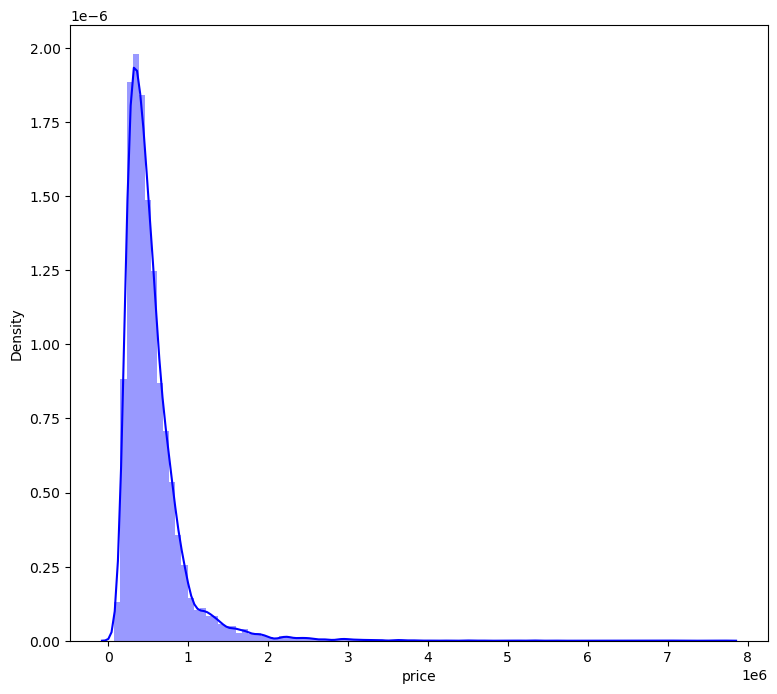

In [19]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='b', bins=100, hist_kws={'alpha': 0.4});

### Numeric Data Distribution

<Figure size 3000x1500 with 0 Axes>

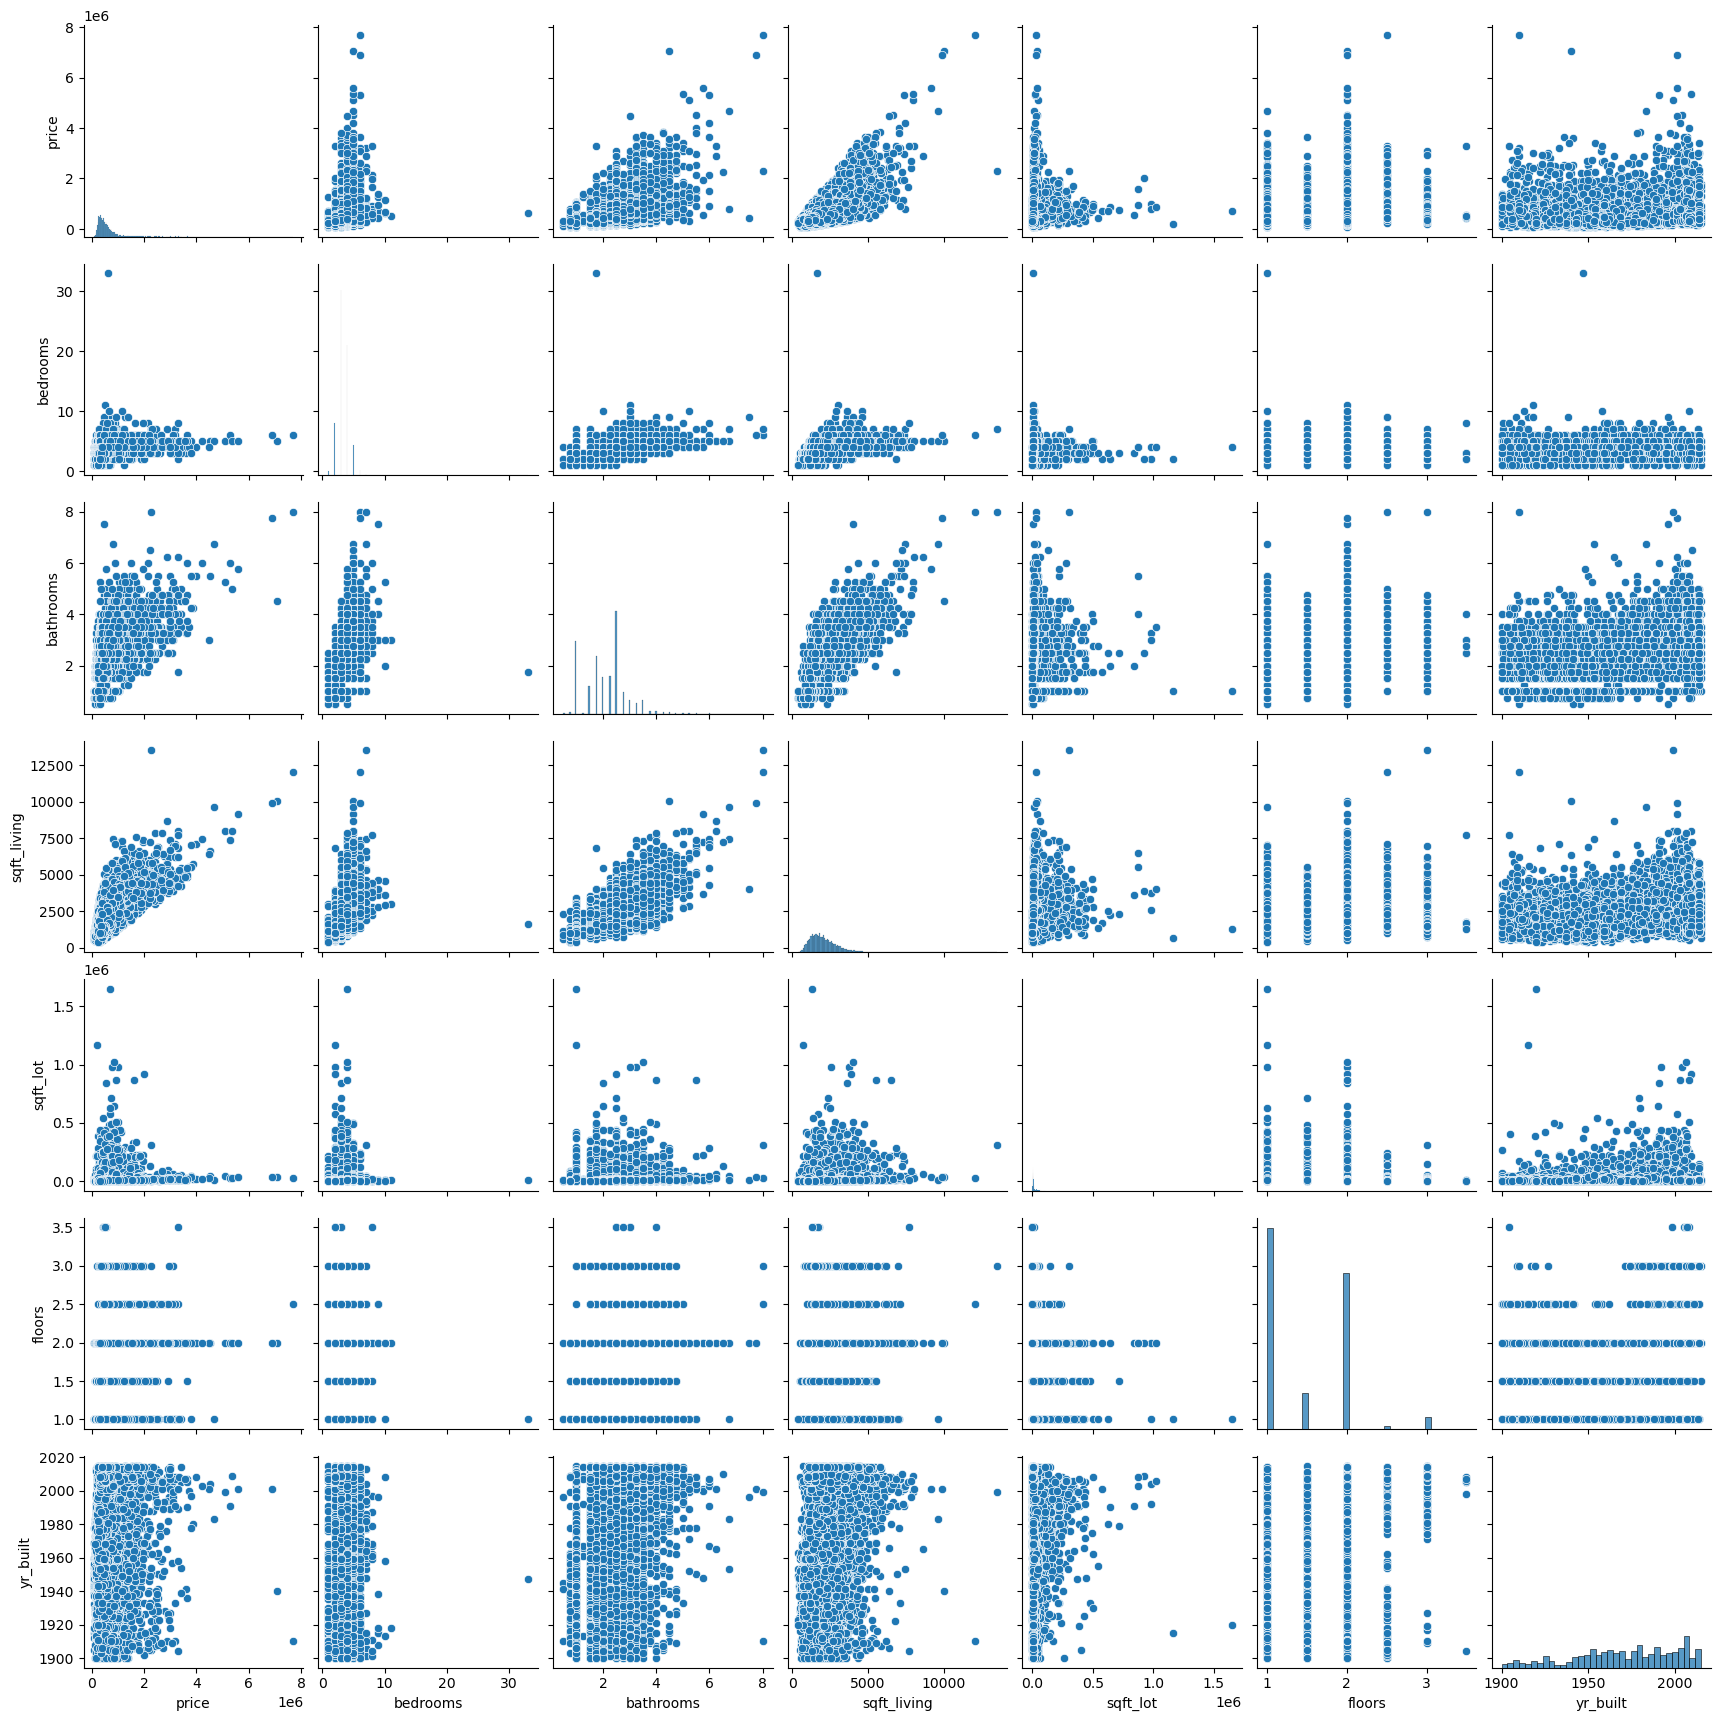

In [20]:
plt.figure(figsize=(30,15))
sns.pairplot(df.iloc[:,1:])
plt.show()

Based off this plot, the number of bathrooms, bedrooms and square footage of the lot are the most correlated features with price.

## Basic model

In [21]:
columns_to_encode = ['waterfront', 'grade', 'condition']

# Subset the dataframe with the columns to encode
dummies = pd.get_dummies(df[columns_to_encode], drop_first=True).astype(int)
df_encoded = pd.concat([df, dummies], axis=1)
df_encoded.drop(columns_to_encode, axis=1, inplace=True)
df_encoded.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,renovated,waterfront_YES,...,grade_Low,grade_Low Average,grade_Luxury,grade_Mansion,grade_Poor,grade_Very Good,condition_Fair,condition_Good,condition_Poor,condition_Very Good
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,Yes,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,No,0,...,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,No,0,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,No,0,...,0,0,0,0,0,0,0,0,0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,2001,No,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_1 = df_encoded.drop(['price','renovated','id'], axis=1)  # Independent variables
y = df_encoded['price']  # Dependent variable

# Add a constant term to the independent variables matrix
X = sm.add_constant(X_1)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1917.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:01:15   Log-Likelihood:            -2.6293e+05
No. Observations:               19219   AIC:                         5.259e+05
Df Residuals:                   19197   BIC:                         5.261e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.966e+06   1

R-squared and Adj. R-squared: The R-squared value (0.677) represents the proportion of variance in the dependent variable (price) that is explained by the independent variables in the model. In this case, the model explains approximately 67.7% of the variance. The Adj. R-squared is the adjusted R-squared value, which takes into account the number of predictors in the model. Both values indicate the goodness-of-fit of the model.Overall, this indicates a moderate level of predictive power and a room for improvement.

F-statistic and Prob (F-statistic): The F-statistic (1917.0) tests the overall significance of the model. The high F-statistic value is associated  with a small p-value (Prob (F-statistic)) which indicates that the model's overall fit is statistically significant, suggesting that at least one of the independent variables is associated with the dependent variable.The p-value of 0.00 is less than the significance level (0.05). Therefore, the model is statistically significant. 

Coefficients: The coefficients (coef) represent the estimated effect of each independent variable on the dependent variable (price). The number of bedrooms has a negative correlation with sale price. 

The condition number of 6.04e+6 raises concerns about potential multicollinearity problems.

The presence of non-normality in the residuals, as indicated by a low probability (Prob(Omnibus): 0.000) and high Kurtosis value (24.103), suggests the possibility of heteroscedasticity.

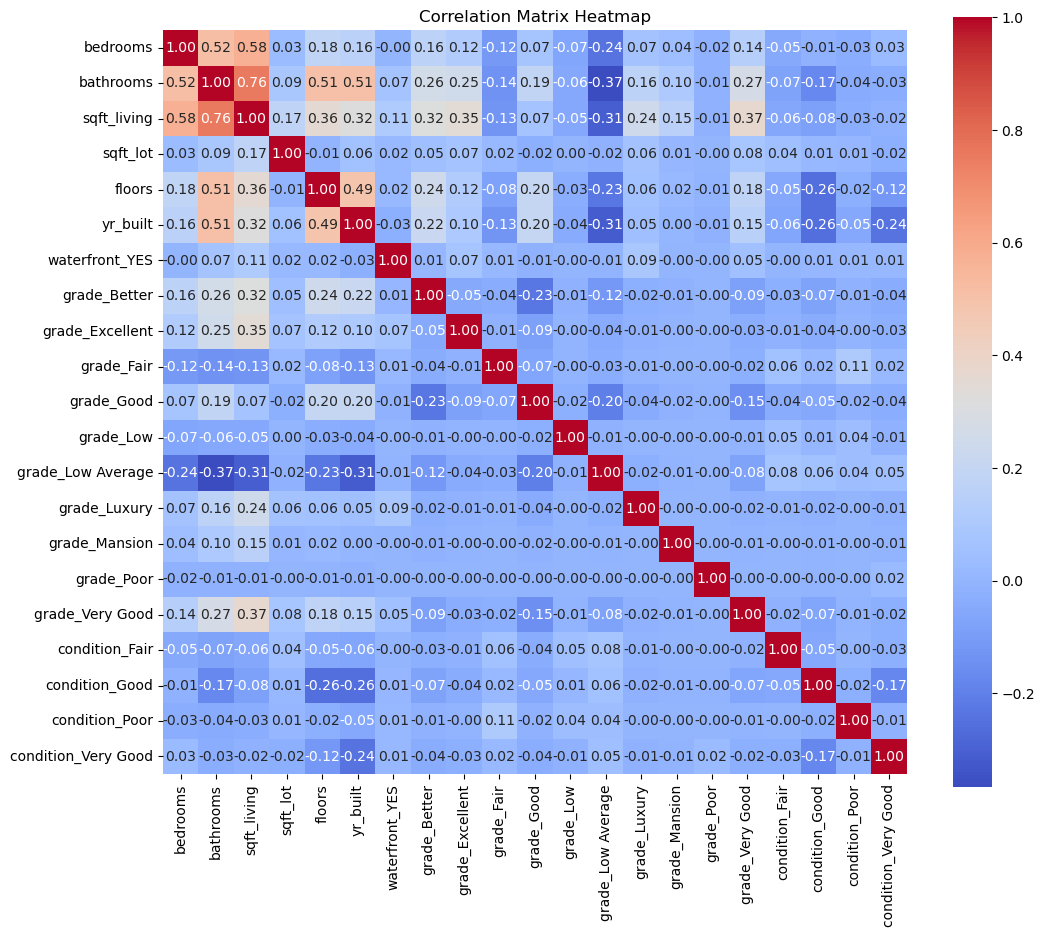

In [23]:
# Subset the dataframe with the desired columns
subset_df = X_1

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

It can be useful to linearize relationships that are inherently nonlinear by changing the "sqft_lot" column in log. This transformation can make it easier to use linear regression or other linear models to simulate the relationship between the variable and the response variable. The relationship between "sqft_lot" and the response variable may become more linear and simpler to measure using linear techniques by employing the log transformation.

By removing the sqft_lot column, multicollinearity with the log(sqft_lot) column will no longer occur.

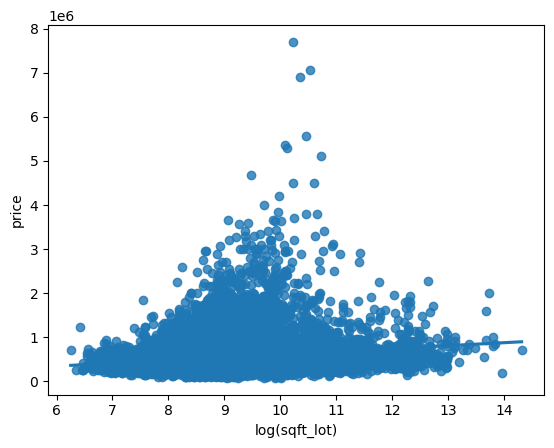

In [24]:
X_1['log(sqft_lot)'] = np.log(X_1['sqft_lot'])
sns.regplot(x=X_1['log(sqft_lot)'], y=y, ci=None);

In [25]:
X_2 = X_1.drop(["sqft_lot"], axis=1)  # Independent variables

# Add a constant term to the independent variables matrix
X = sm.add_constant(X_2)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:01:16   Log-Likelihood:            -2.6276e+05
No. Observations:               19219   AIC:                         5.256e+05
Df Residuals:                   19197   BIC:                         5.257e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.069e+06   1

The model has an adjusted R-squared value of of 0.683 which is an increase from the previous model. Also, the multicollinearity has been reduced.

Suggestions to improve the model:

1. Evaluating potential interactions or non-linear relationships between variables. The current model assumes a linear relationship between the independent variables and the dependent variable. However, there may exist interactions or non-linear effects that could be captured by including interaction terms or polynomial features. Exploring these possibilities may enhance the model's predictive power.

2. Evaluating other regression techniques beyond ordinary least squares (OLS) regression. Depending on the nature of the data and the relationships between variables, alternative regression models such as Ridge Regression, Lasso Regression, or Elastic Net Regression could be explored to handle potential multicollinearity and improve the model's performance.

3. Address any concerns related to heteroscedasticity or autocorrelation. The Durbin-Watson statistic can provide insights into the presence of autocorrelation, and graphical analysis of residual plots can help identify potential heteroscedasticity. If these issues are detected, further investigation and potential model adjustments may be necessary.


In [26]:
#Suggestion #1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge Regression R-squared:", ridge_r2)

# Lasso Regression
lasso = Lasso(alpha=1.0) 
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso Regression R-squared:", lasso_r2)

Ridge Regression R-squared: 0.6573283964678036
Lasso Regression R-squared: 0.658889898854146


In [27]:
#Suggestion 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_poly)

# Evaluate the performance using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared with Polynomial Features:", r2)

R-squared with Polynomial Features: 0.6751367564977901


Durbin-Watson statistic: 1.9787533399706854


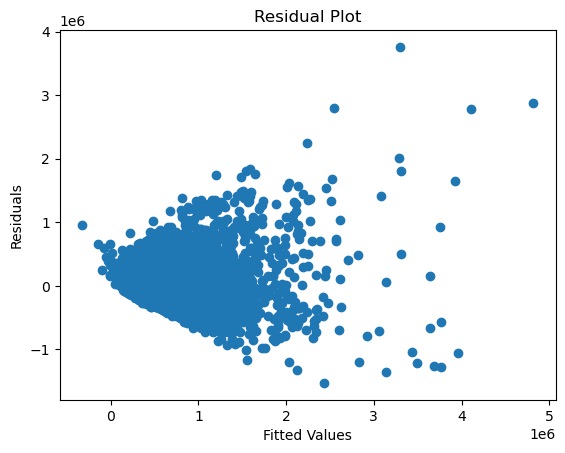

In [28]:
#Suggestion 3

# Add constant to the independent variables
X = sm.add_constant(X_2)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Residual analysis
residuals = results.resid

# Check for autocorrelation using Durbin-Watson statistic
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson)

# Plot residuals to check for heteroscedasticity
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In the output above, the Durbin-Watson statistic has a value of 1.9787533399706854. Since this value is close to 2, it indicates that there is little to no autocorrelation present in the residuals of the regression model. This suggests that the errors in the model are not systematically related to each other over time or across observations.

#### Standardize `bedrooms`, `bathrooms`, `sqft_living` and `floors` columns

In [82]:
X_3 = X_2.reset_index(drop=True)
scaled_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
scaled = X_3[scaled_columns]

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(scaled), columns = scaled_columns)

x_sub = X_3.drop(scaled_columns, axis = 1)

X_final = pd.merge(X_scaled, x_sub, left_index=True, right_index=True)

# Add a constant column to the standardized X
X_scaled = sm.add_constant(X_final)

# Create the linear regression model
model = sm.OLS(y.reset_index(drop=True), X_scaled)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:55:23   Log-Likelihood:            -2.6276e+05
No. Observations:               19219   AIC:                         5.256e+05
Df Residuals:                   19197   BIC:                         5.257e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 7.43e+06   1



By standardizing the columns in the model, the variables are transformed to the same scale, enabling a meaningful comparison of the coefficients. This allows us to assess the relative strengths of the coefficients and determine which variables have the most significant influences on the price. However, the R-squared did not increase. Therefore, this might be the best model


#### Checking for  multicollinearity between columns using VIF

In [30]:
# Add a constant column to the DataFrame
X_final['constant'] = 1

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_final.columns
vif["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Print the VIF values
print(vif)

               Variable          VIF
0              bedrooms     1.690570
1             bathrooms     3.322796
2           sqft_living     4.910483
3                floors     1.833130
4              yr_built     1.821654
5        waterfront_YES     1.031098
6          grade_Better     1.771064
7       grade_Excellent     1.513141
8            grade_Fair     1.066379
9            grade_Good     1.525408
10            grade_Low     1.013413
11    grade_Low Average     1.259751
12         grade_Luxury     1.233819
13        grade_Mansion     1.082869
14           grade_Poor     1.001285
15      grade_Very Good     1.719168
16       condition_Fair     1.027336
17       condition_Good     1.206203
18       condition_Poor     1.018925
19  condition_Very Good     1.164509
20        log(sqft_lot)     1.430873
21             constant  7906.094482


Most of the variables have VIF values close to 1, which indicates a low level of multicollinearity. The provided VIF values suggest that there is no significant multicollinearity issue among the independent variables, except for the constant variable.

In [78]:
#Print final model's coefficients
coeff_df = pd.DataFrame(results.params)
coeff_df.columns = ['Model\'s Coefficients']
coeff_df

,Model's Coefficients
const,7.429933e+06
bedrooms,-2.554625e+04
bathrooms,3.579325e+04
sqft_living,1.540586e+05
floors,2.686939e+03
yr_built,-3.362597e+03
waterfront_YES,7.440480e+05
grade_Better,2.451421e+05
grade_Excellent,6.791478e+05
grade_Fair,-1.205673e+05


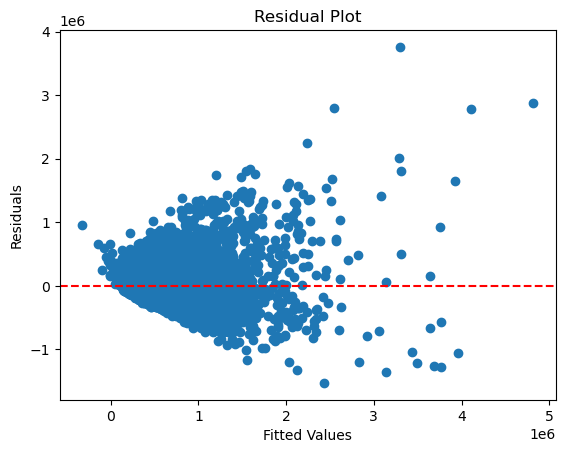

In [79]:
# Plot of the residuals
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Based on the regression analysis, we can draw the following conclusions and recommendations:

Model Performance: The model has an R-squared value of 0.683, which means that approximately 68.3% of the variation in the dependent variable (price) is explained by the independent variables included in the model. This indicates that the model has moderate predictive power.

Significant Variables: Several variables have statistically significant coefficients at a significance level of 0.05. These include 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'waterfront_YES', 'grade_Better', 'grade_Excellent', 'grade_Fair', 'grade_Good', 'grade_Low Average', 'grade_Luxury', 'grade_Mansion', 'grade_Very Good', 'condition_Good', 'condition_Very Good', and 'log(sqft_lot)'. These variables have a significant impact on the price of the house.

Insignificant Variables: The variables 'floors', 'grade_Poor', 'condition_Fair', and 'condition_Poor' have coefficients that are not statistically significant at a significance level of 0.05. These variables may not have a significant impact on the price and may be removed from the model.

## Conclusion

Based on the regression model results, we can conclude that certain factors have a significant impact on house prices:

- *Waterfront Location:* Houses situated on waterfronts have a substantial positive effect on the house price. The coefficient of the "waterfront_YES" variable suggests that having a waterfront location significantly increases the price. Buyers often perceive waterfront properties as desirable and are willing to pay a premium for the scenic views and access to water-related activities.
<br>
 
- *Luxurious Features:* The presence of luxurious features, as indicated by variables such as "grade_Better," "grade_Excellent," "grade_Luxury," and "grade_Mansion," has a significant positive influence on house prices. These features can include high-quality construction, upscale finishes, and premium amenities. Properties with superior grades tend to command higher prices due to their perceived value and exclusivity.
<br>
- *House Condition:* Maintaining a house in good condition is crucial to avoid a decrease in its value. The coefficient of the "condition_Good" variable suggests that houses in good condition tend to have higher prices. Buyers are generally attracted to properties that are well-maintained, free from significant flaws or deficiencies, and ready for immediate occupancy.
<br>

## Recommendations

Based on these findings, the real estate agency should consider the following recommendations:

  - **Emphasize Waterfront Properties:** Highlight the waterfront locations of properties in marketing materials and listing descriptions. Showcase the unique features and benefits associated with waterfront living to attract potential buyers and justify higher price expectations.
<br>

  - **Enhance Luxurious Features:** Encourage homeowners to invest in upgrades and renovations that add luxurious elements to their properties. This could include improving the quality of materials, incorporating upscale amenities, and enhancing the overall aesthetic appeal. These improvements can increase the perceived value of the property and justify higher listing prices.
<br>

  - **Promote Proper Maintenance:** Educate homeowners on the importance of regular maintenance and timely repairs. Encourage them to address any issues promptly to preserve the condition of their properties. This will help maintain the market value and prevent potential price depreciation due to neglect or deterioration.
<br>

By focusing on these recommendations, the real estate agency can help homeowners maximize their property values and assist buyers in finding houses with desirable features.
